In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
from sqlalchemy import create_engine
import pandas as pd
# Step 1: Connect to PostgreSQL
# Replace placeholders with your actual details
username = "postgres"      # default user
password = "123456789" # the password you set during installation
host = "localhost"         # if running locally
port = "5432"              # default PostgreSQL port
database = "banking_analysis"    # the database you created in pgAdmin

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

# Step 2: Load DataFrame into PostgreSQL
table_name = "customers"   # choose any table name
df = pd.read_sql(table_name, engine)

print(f"Data successfully loaded into df '{table_name}' in database '{database}'.")

Data successfully loaded into df 'customers' in database 'banking_analysis'.


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   client_id                 3000 non-null   object        
 1   name                      3000 non-null   object        
 2   age                       3000 non-null   int64         
 3   location_id               3000 non-null   int64         
 4   joined_bank               3000 non-null   datetime64[ns]
 5   banking_contact           3000 non-null   object        
 6   nationality               3000 non-null   object        
 7   occupation                3000 non-null   object        
 8   fee_structure             3000 non-null   object        
 9   loyalty_classification    3000 non-null   object        
 10  estimated_income          3000 non-null   float64       
 11  superannuation_savings    3000 non-null   float64       
 12  amount_of_credit_car

In [3]:
df.describe()

,age,location_id,joined_bank,estimated_income,superannuation_savings,amount_of_credit_cards,credit_card_balance,bank_loans,bank_deposits,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,genderid,iaid
count,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,2010-08-15 00:03:21.600000,171305.034263,25531.599673,1.463667,3176.206943,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529993,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
min,17.000000,12.000000,1995-01-03 00:00:00,15919.480000,1482.030000,1.000000,1.170000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,45.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,2004-04-01 18:00:00,82906.595000,12513.775000,1.000000,1236.630000,2.396281e+05,2.044004e+05,1.199475e+05,7.479440e+04,11916.542500,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,2011-02-18 00:00:00,142313.480000,22357.355000,1.000000,2560.805000,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.190000,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,2017-12-24 06:00:00,242290.305000,35464.740000,2.000000,4522.632500,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.392500,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,2021-12-31 00:00:00,522330.260000,75963.900000,3.000000,13991.990000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.870000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000
std,19.854760,12462.273017,NaN,111935.808209,16259.950770,0.676387,2497.094709,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924010,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242


In [4]:
df.isnull().sum()

client_id                   0
name                        0
age                         0
location_id                 0
joined_bank                 0
banking_contact             0
nationality                 0
occupation                  0
fee_structure               0
loyalty_classification      0
estimated_income            0
superannuation_savings      0
amount_of_credit_cards      0
credit_card_balance         0
bank_loans                  0
bank_deposits               0
checking_accounts           0
saving_accounts             0
foreign_currency_account    0
business_lending            0
properties_owned            0
risk_weighting              0
brid                        0
genderid                    0
iaid                        0
dtype: int64

In [6]:
bins = [0,100000,300000,float('inf')]
labels = ['Low','Medium','High']

df['income_category'] = pd.cut(df['estimated_income'], bins=bins, labels=labels)

In [20]:
df['income_category'].value_counts()

income_category
Medium    1517
Low       1027
High       456
Name: count, dtype: int64

### Univarient Analysis

In [25]:
df.head()

,client_id,name,age,location_id,joined_bank,banking_contact,nationality,occupation,fee_structure,loyalty_classification,...,checking_accounts,saving_accounts,foreign_currency_account,business_lending,properties_owned,risk_weighting,brid,genderid,iaid,income_category
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,603617.88,607332.46,12249.96,1134475.30,1,2,1,1,1,Low
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,229521.37,344635.16,61162.31,2000526.10,1,3,2,1,2,Medium
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,652674.69,203054.35,79071.78,548137.58,1,3,3,2,3,Medium
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1048157.49,234685.02,57513.65,1148402.29,0,4,4,1,4,High
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,446644.25,128351.45,30012.14,1674412.12,0,3,1,2,5,Medium


In [28]:
# Examine the distribution of Unique categories in categorical columns
categorical_cols = df[["brid","genderid","iaid","properties_owned","risk_weighting","amount_of_credit_cards","loyalty_classification","income_category","fee_structure","occupation","nationality","age"]].columns
		
for col in categorical_cols:
    print(f"Value count for column '{col}':")
    display(df[col].value_counts())

Value count for column 'brid':


brid
3    1352
1     660
2     495
4     493
Name: count, dtype: int64

Value count for column 'genderid':


genderid
2    1512
1    1488
Name: count, dtype: int64

Value count for column 'iaid':


iaid
1     177
2     177
3     177
4     177
8     177
9     176
13    176
12    176
10    176
11    176
14    176
15    176
6      89
5      89
7      89
16     88
17     88
18     88
19     88
20     88
21     88
22     88
Name: count, dtype: int64

Value count for column 'properties_owned':


properties_owned
2    777
1    776
3    742
0    705
Name: count, dtype: int64

Value count for column 'risk_weighting':


risk_weighting
2    1222
1     836
3     460
4     322
5     160
Name: count, dtype: int64

Value count for column 'amount_of_credit_cards':


amount_of_credit_cards
1    1922
2     765
3     313
Name: count, dtype: int64

Value count for column 'loyalty_classification':


loyalty_classification
Jade        1331
Silver       767
Gold         585
Platinum     317
Name: count, dtype: int64

Value count for column 'income_category':


income_category
Medium    1517
Low       1027
High       456
Name: count, dtype: int64

Value count for column 'fee_structure':


fee_structure
High    1476
Mid      962
Low      562
Name: count, dtype: int64

Value count for column 'occupation':


occupation
Associate Professor             28
Structural Analysis Engineer    28
Recruiter                       25
Account Coordinator             24
Human Resources Manager         24
                                ..
Office Assistant IV              8
Automation Specialist I          7
Computer Systems Analyst I       6
Developer III                    5
Senior Sales Associate           4
Name: count, Length: 195, dtype: int64

Value count for column 'nationality':


nationality
European      1309
Asian          754
American       507
Australian     254
African        176
Name: count, dtype: int64

Value count for column 'age':


age
28    60
76    59
73    54
27    54
47    52
      ..
82    34
57    33
77    32
68    31
39    31
Name: count, Length: 69, dtype: int64

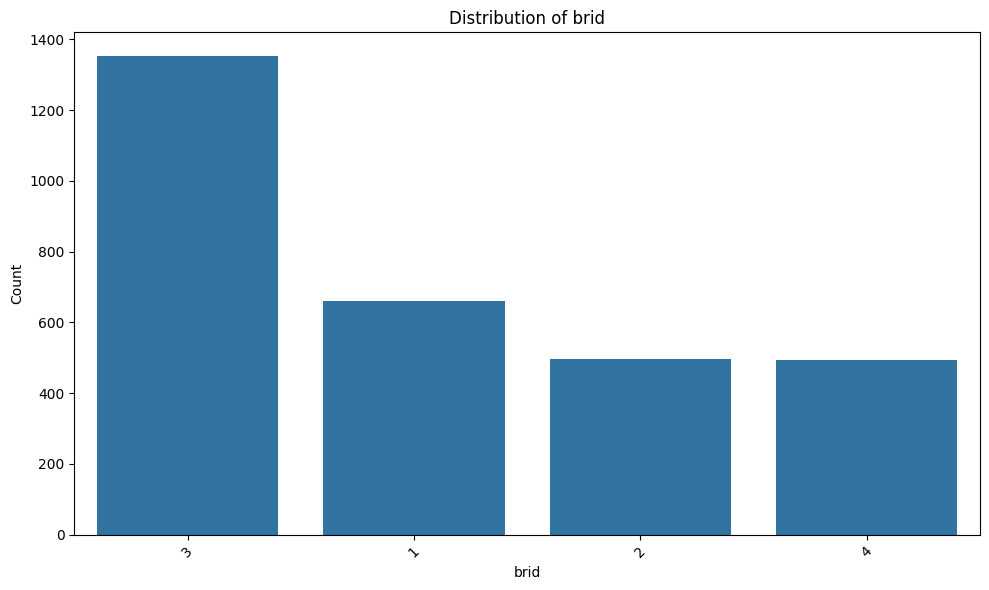

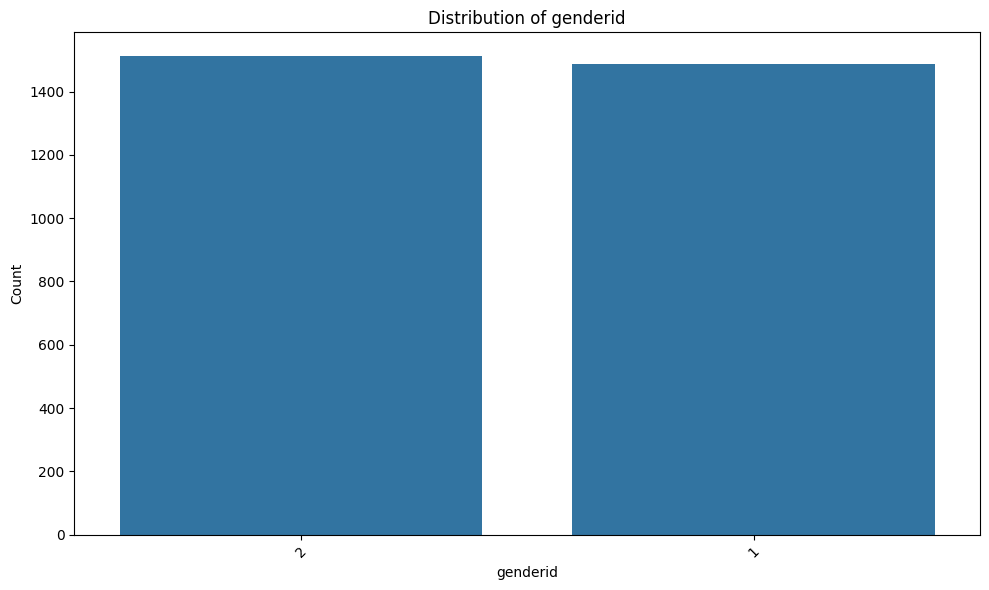

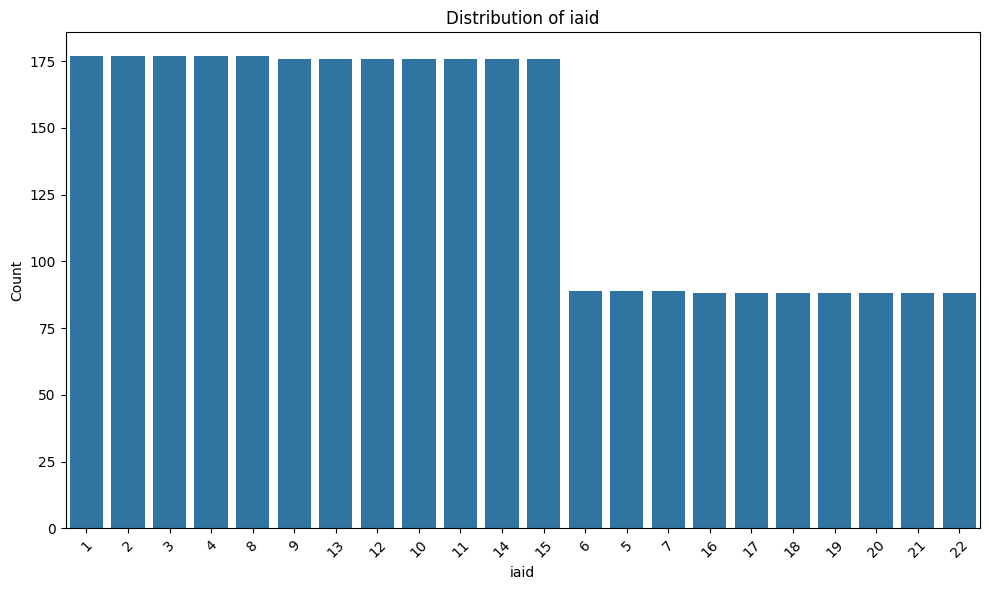

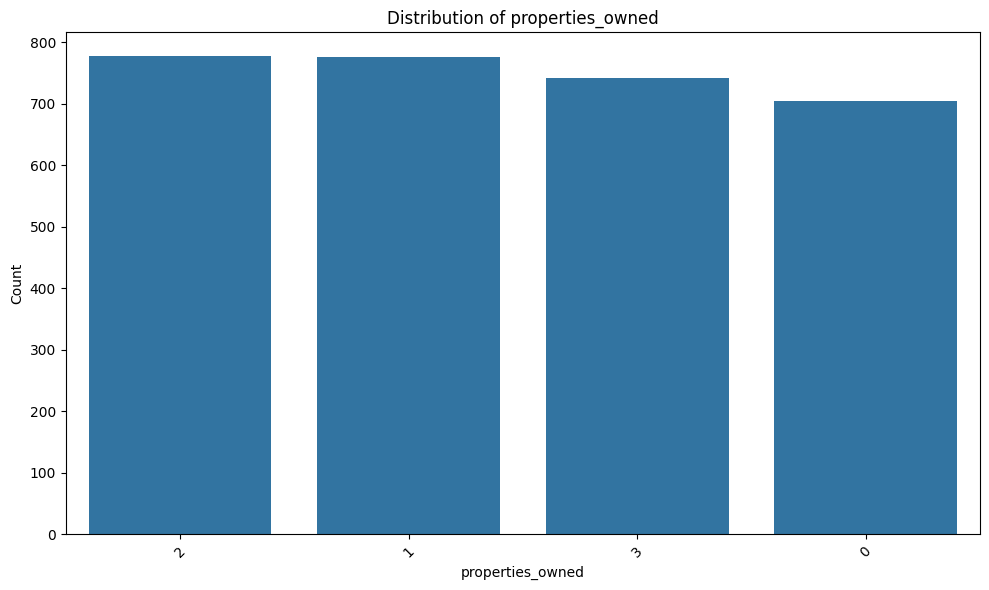

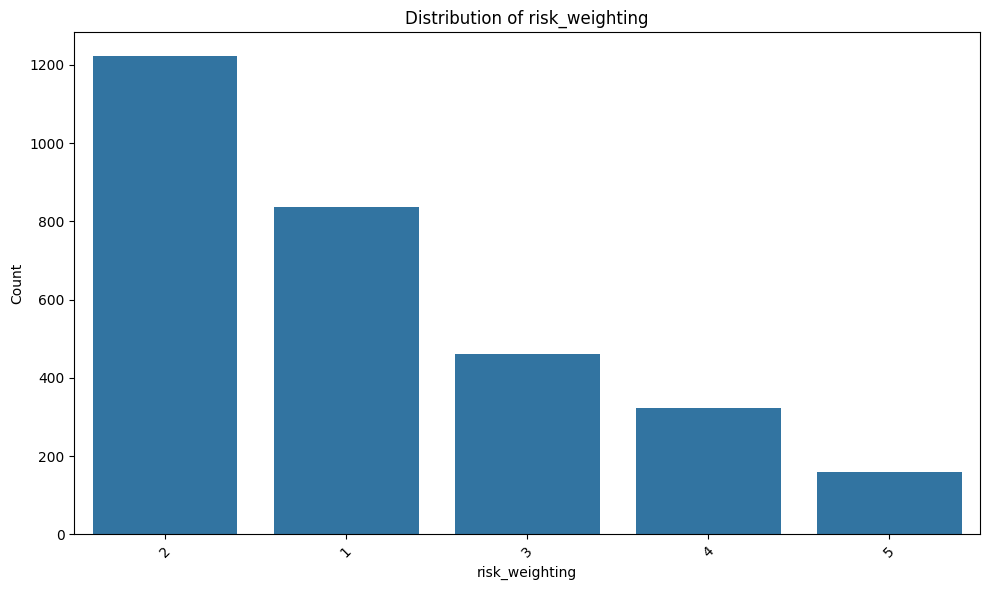

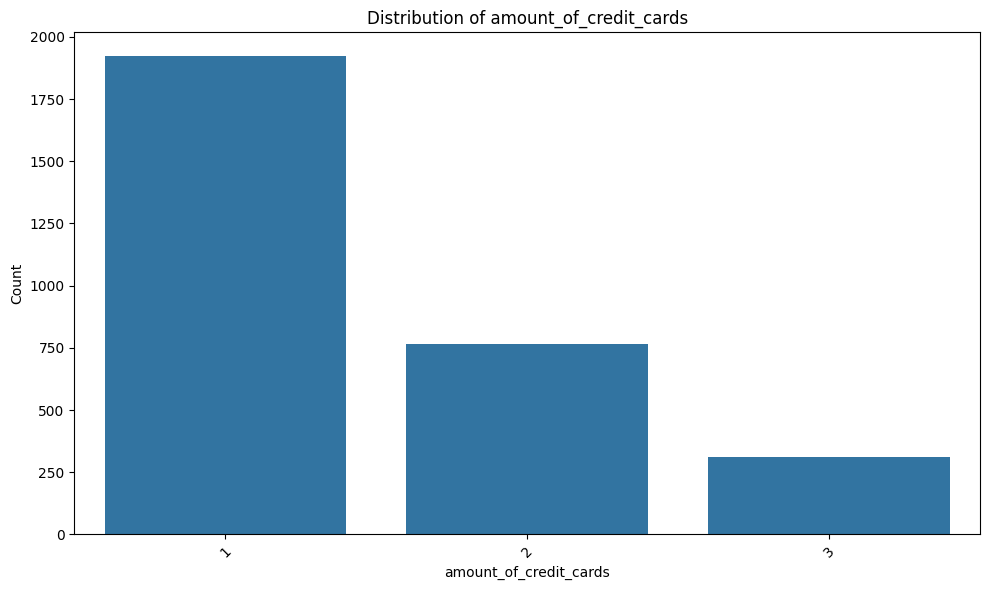

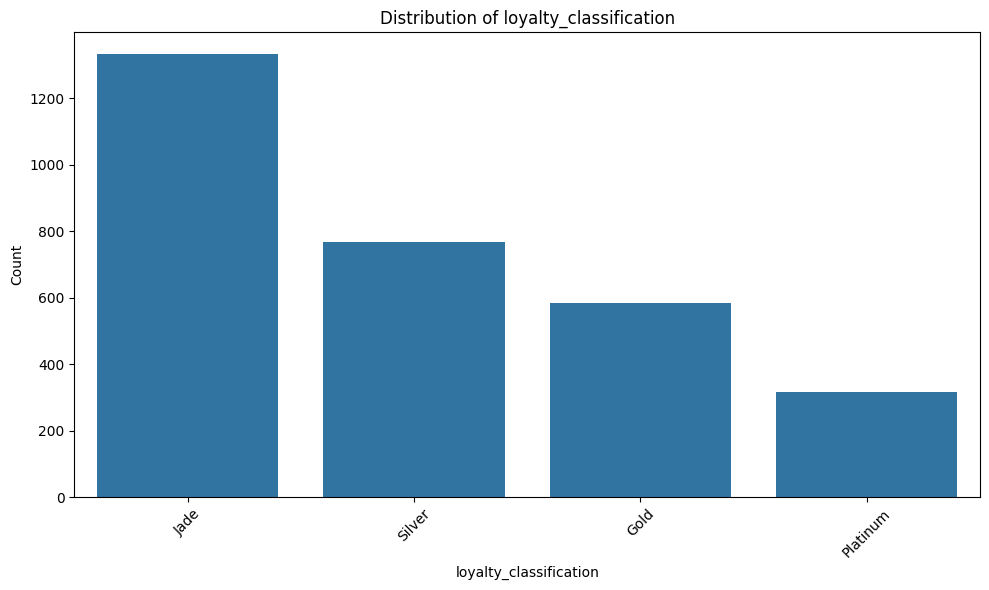

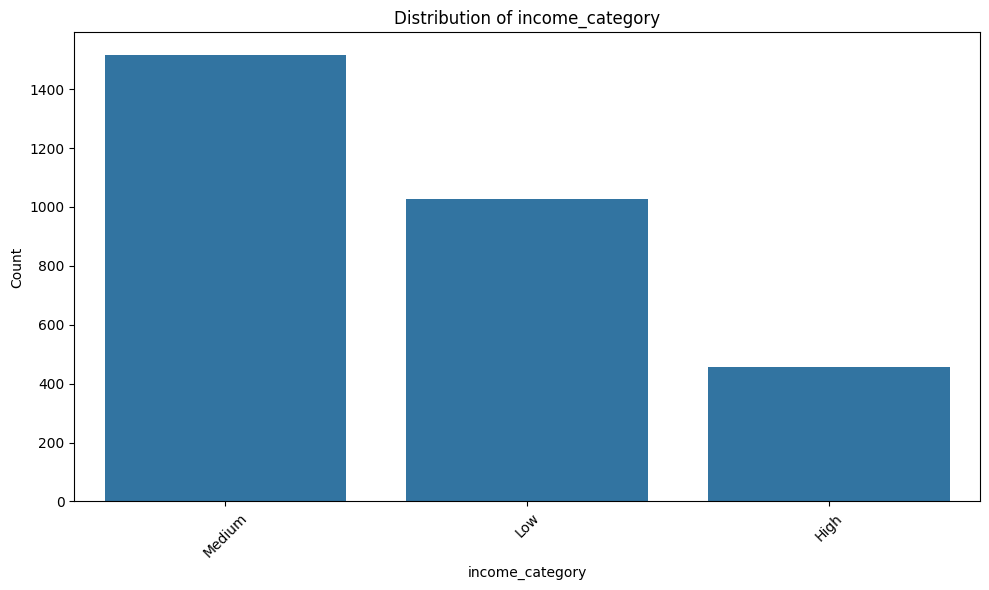

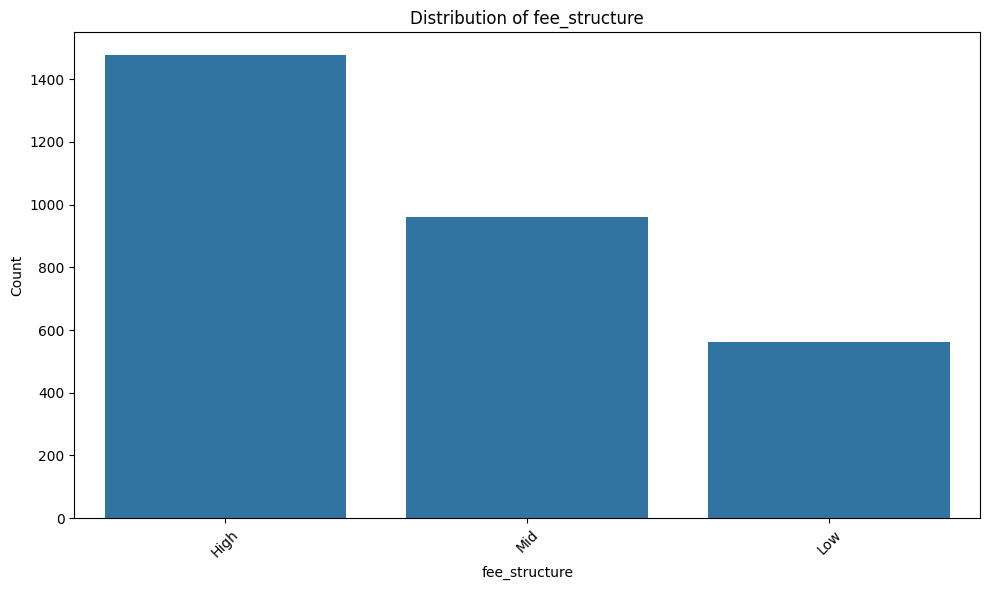

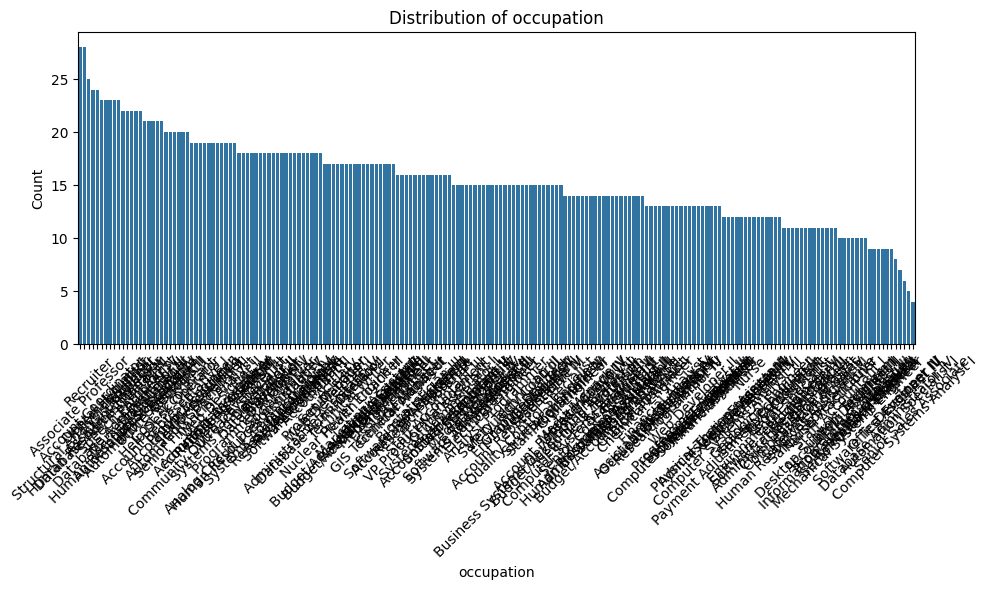

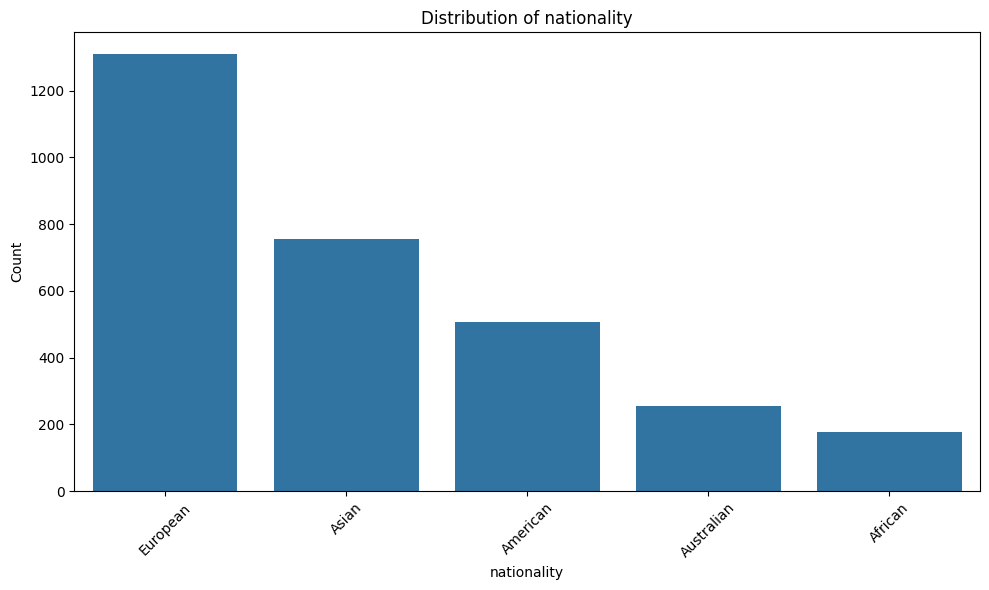

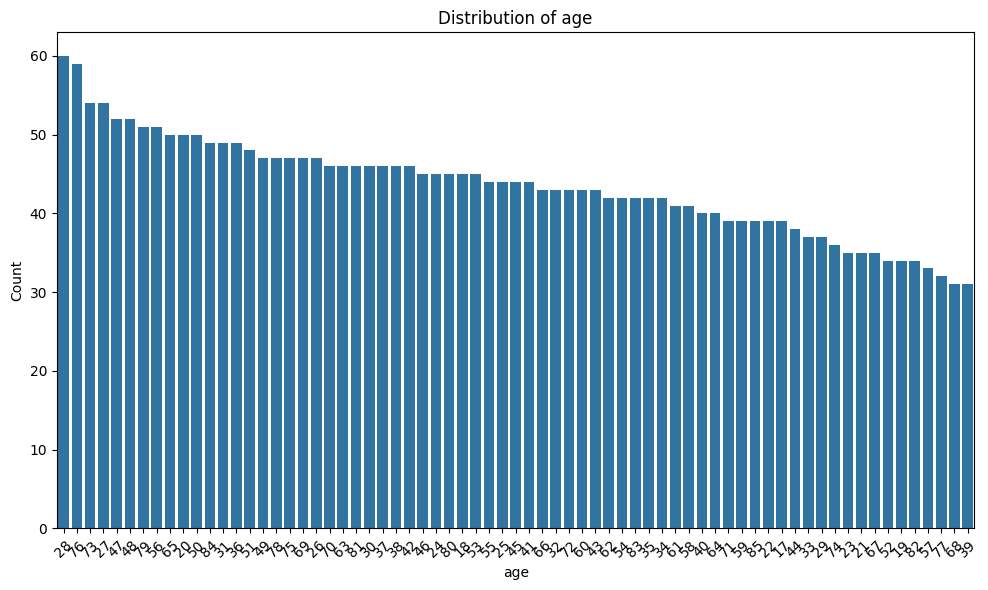

In [31]:
for i, predictor in enumerate(categorical_cols):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=predictor, order=df[predictor].value_counts().index)
    plt.title(f'Distribution of {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Bivariant Analysis

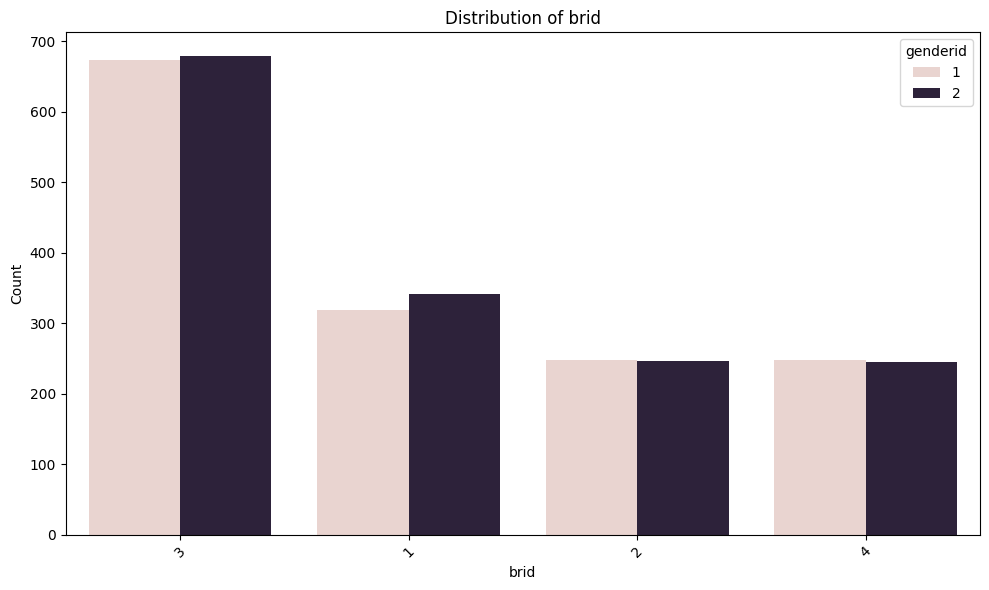

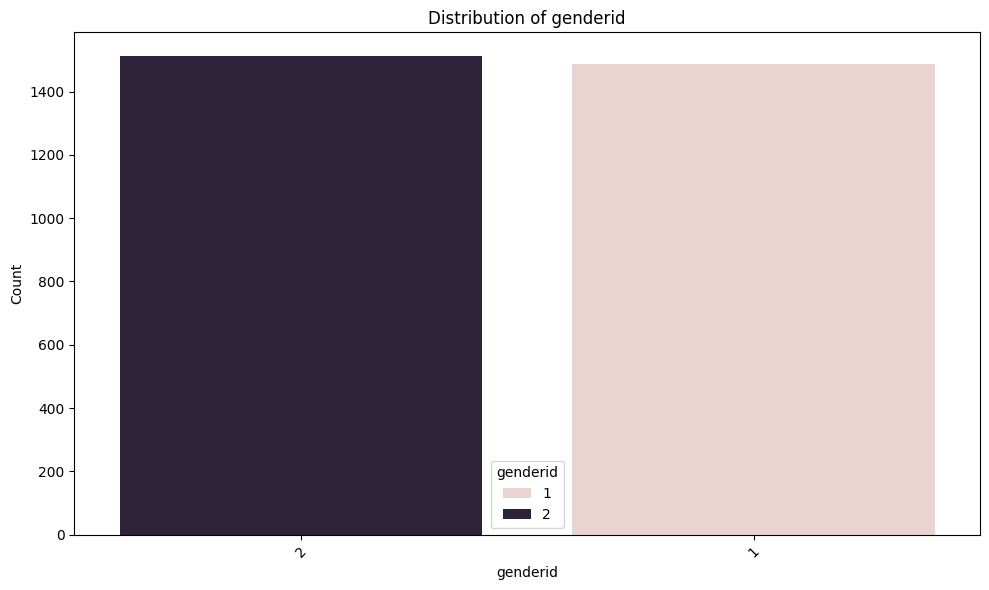

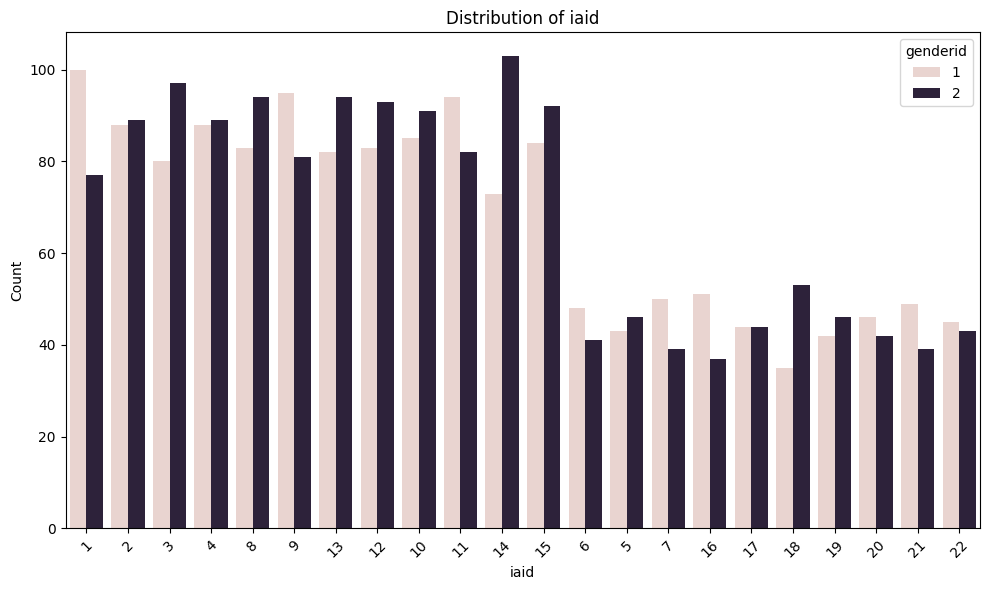

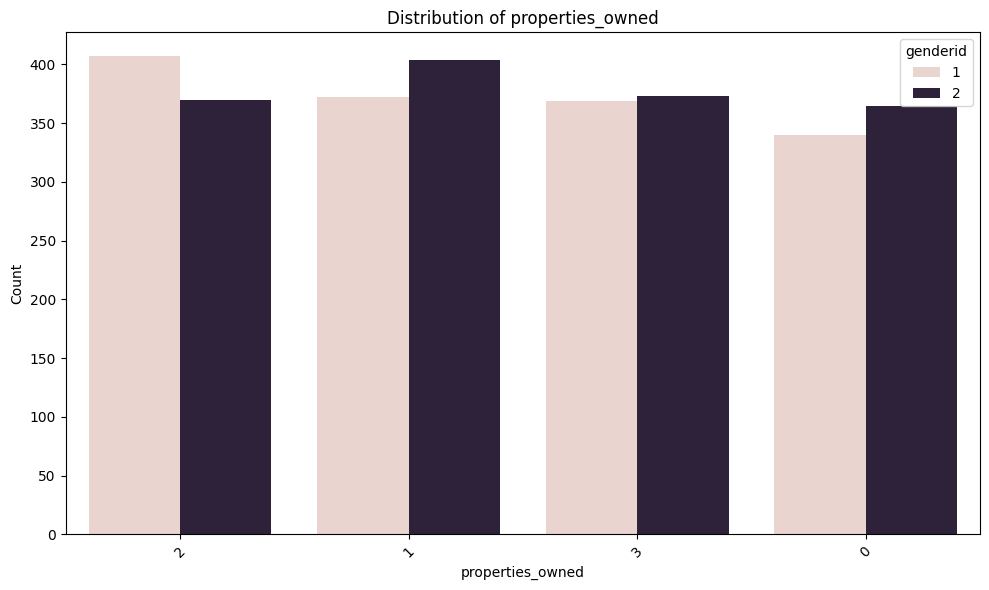

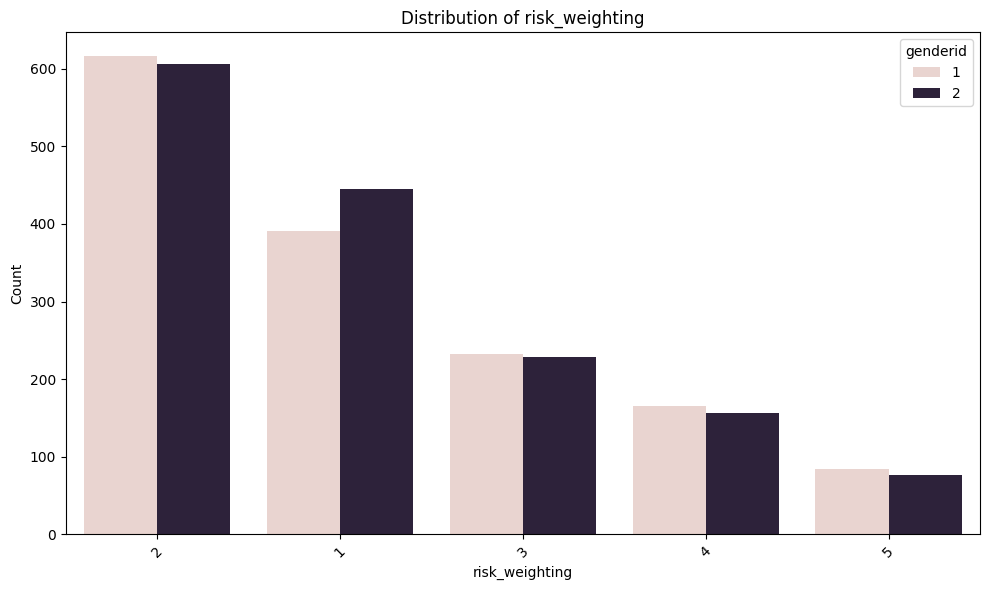

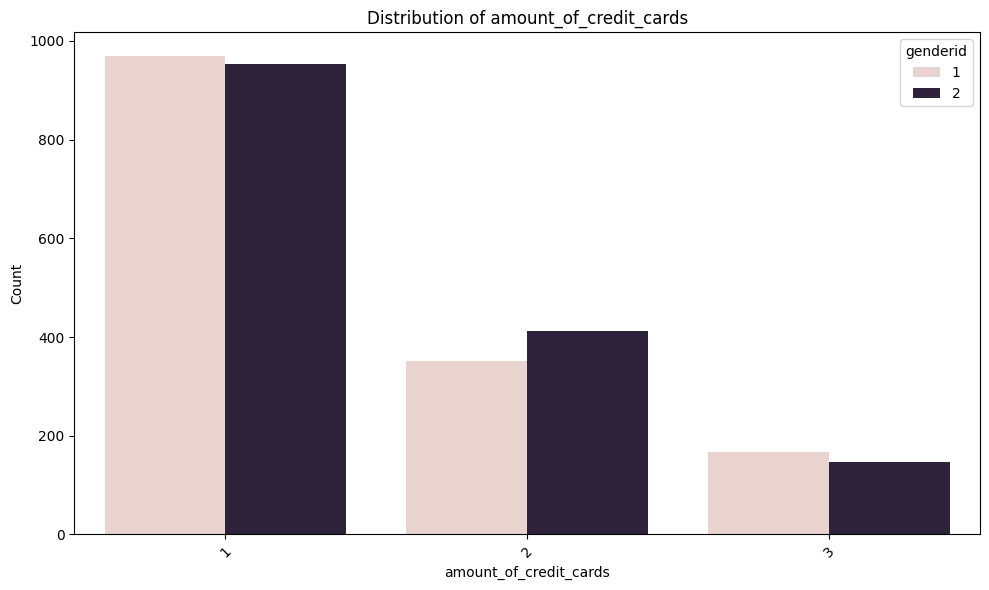

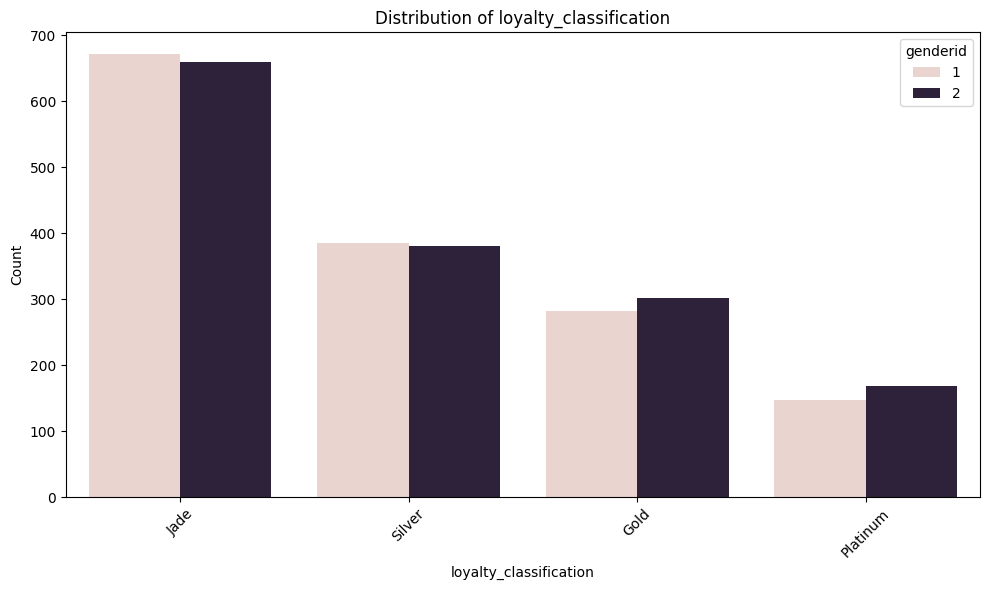

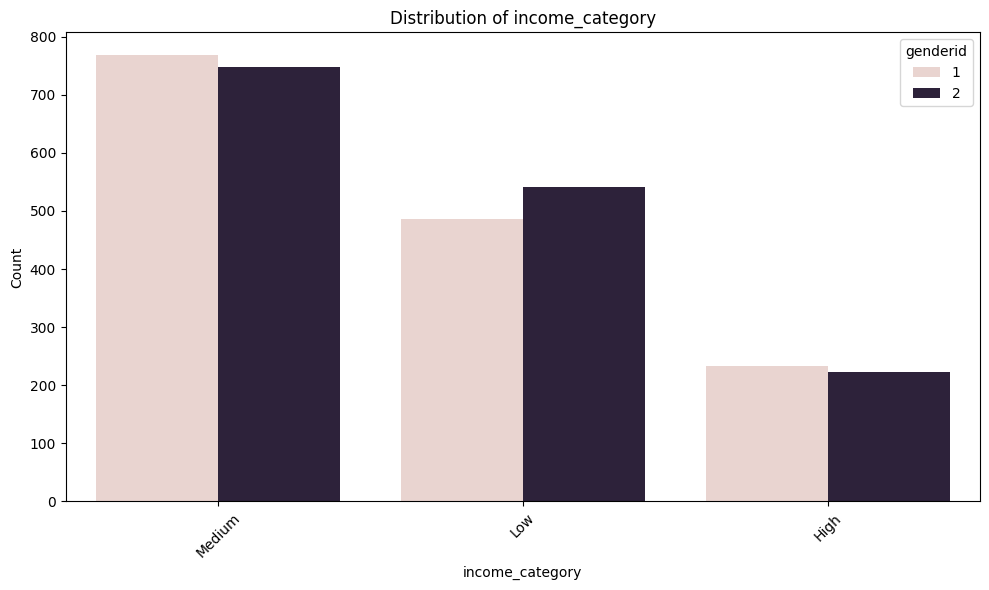

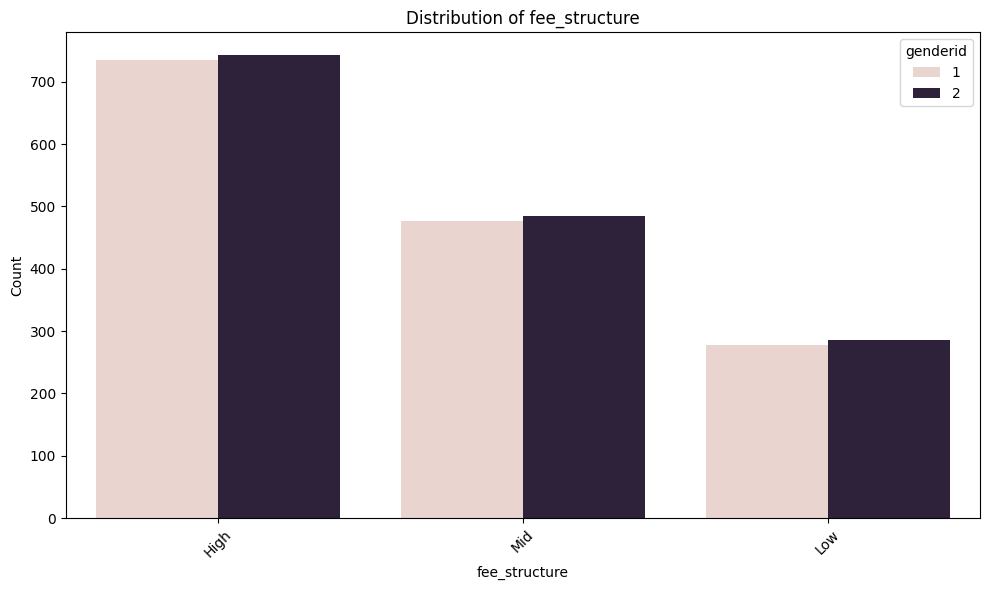

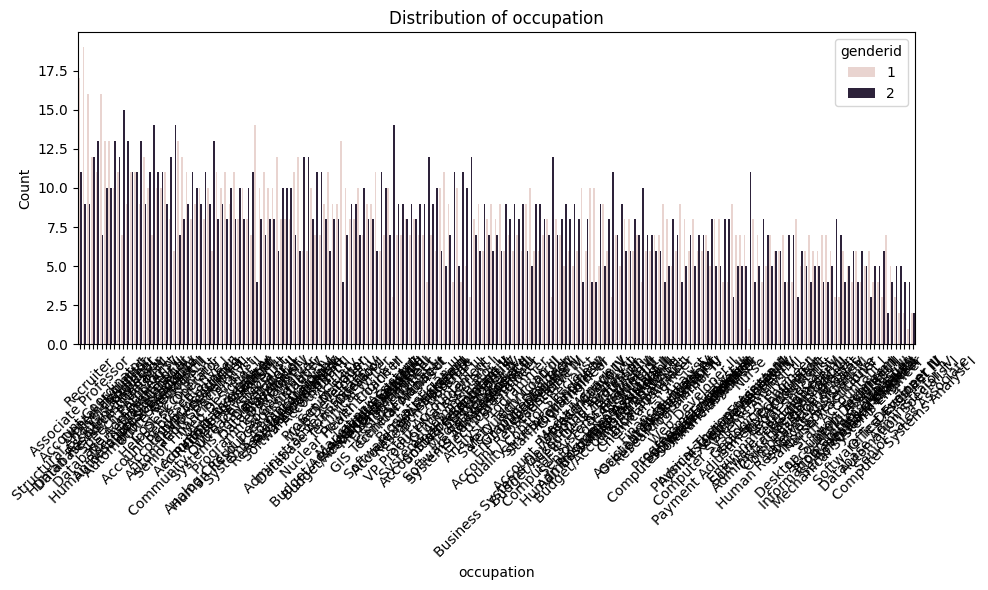

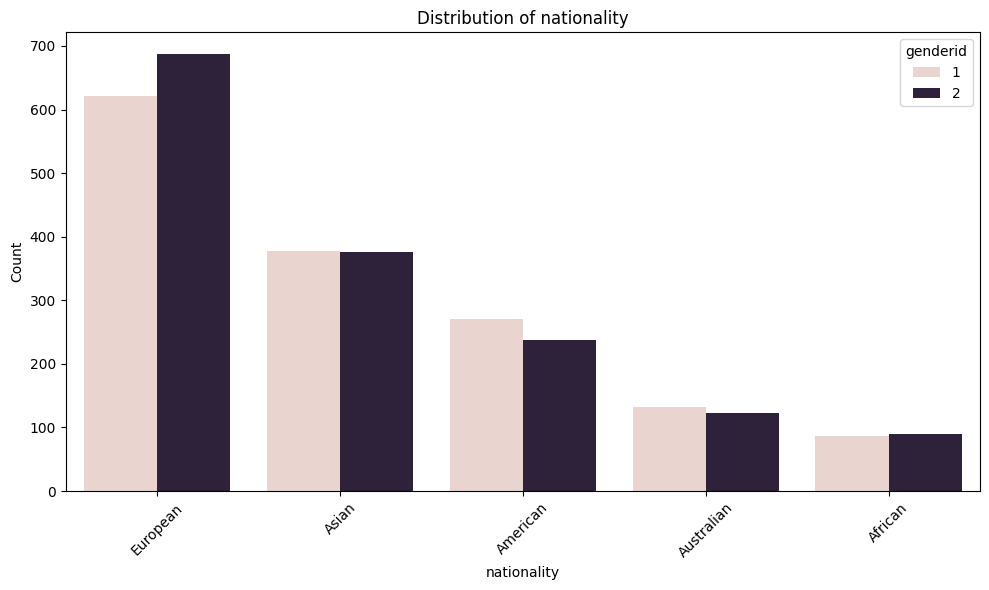

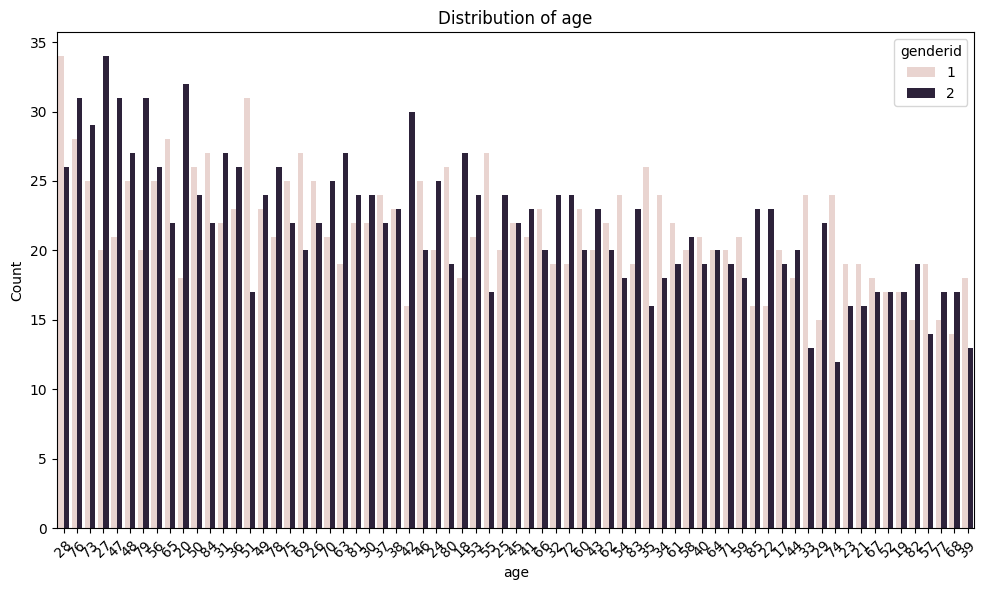

In [32]:
for i, predictor in enumerate(categorical_cols):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=predictor, order=df[predictor].value_counts().index,hue=df['genderid'])
    plt.title(f'Distribution of {predictor}')
    plt.xlabel(predictor)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

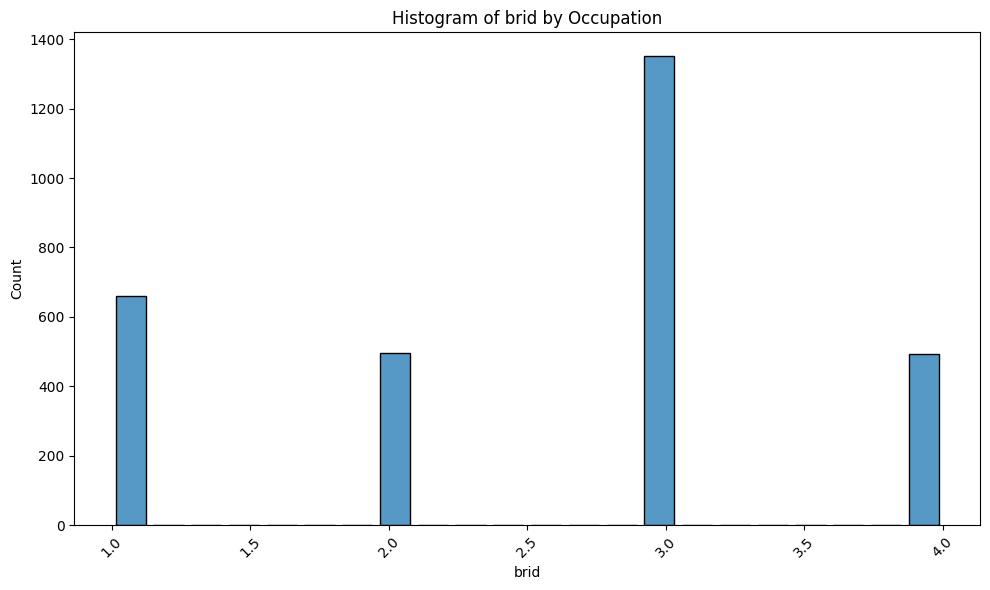

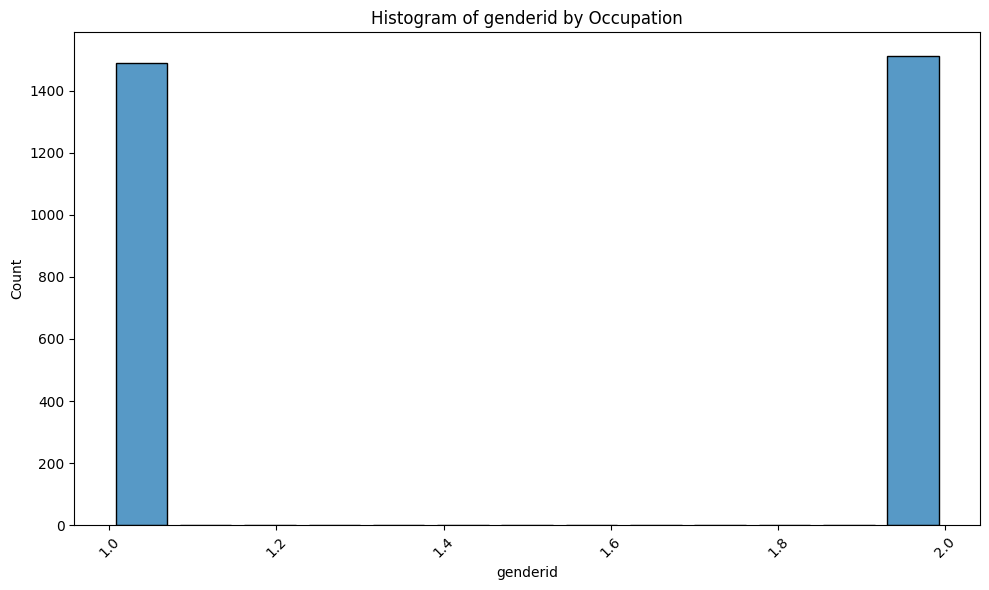

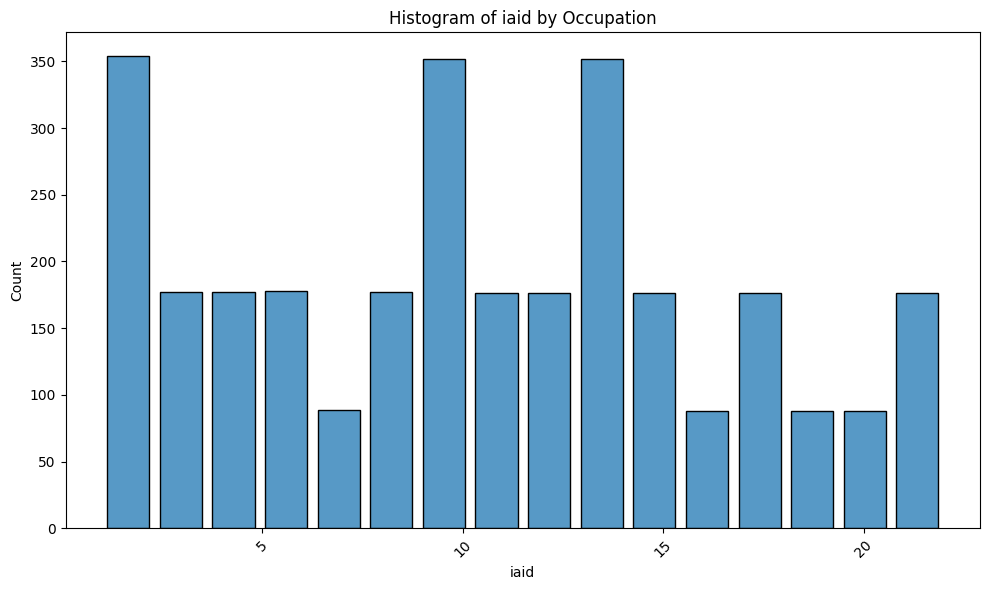

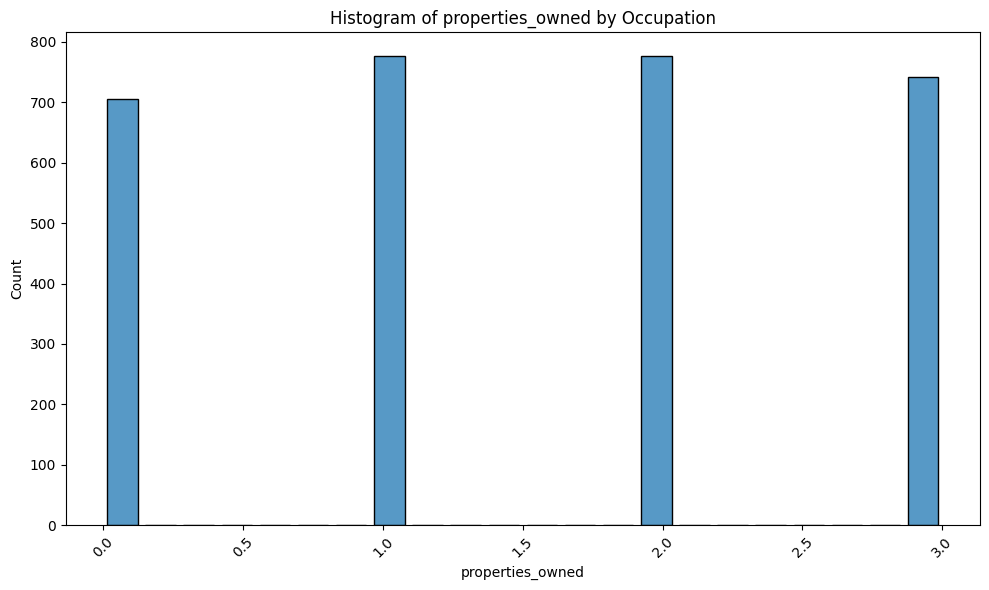

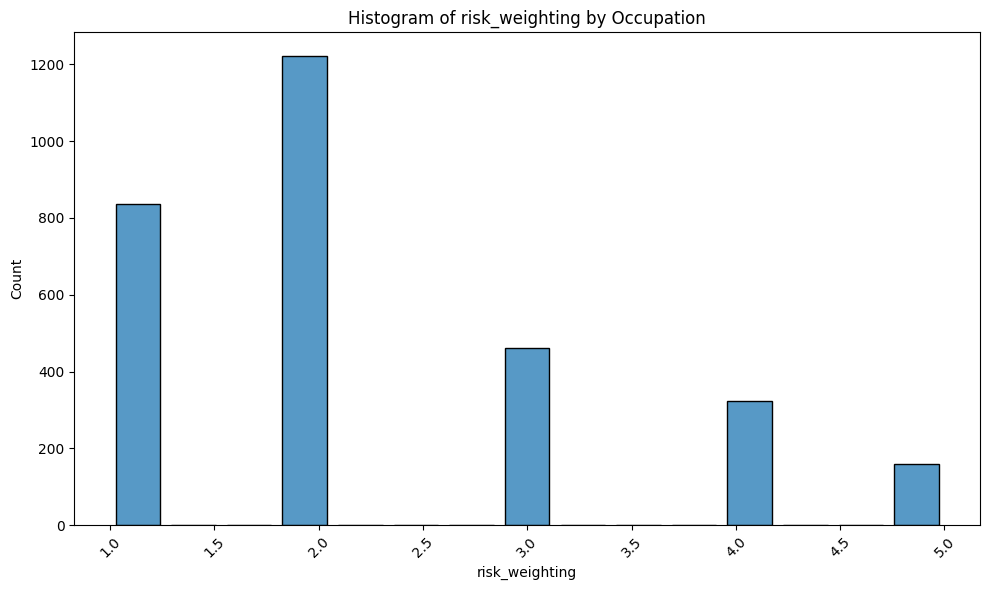

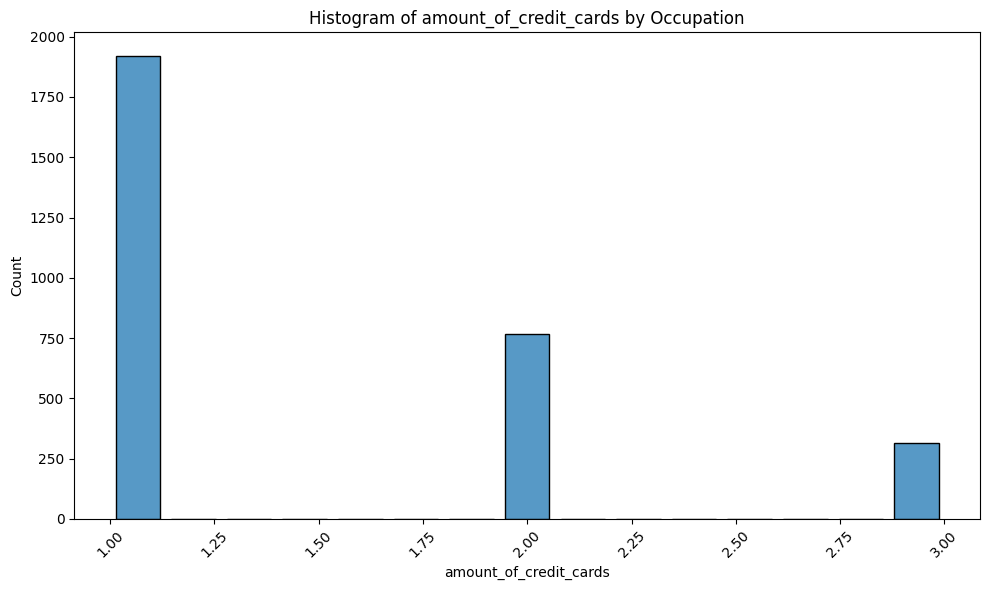

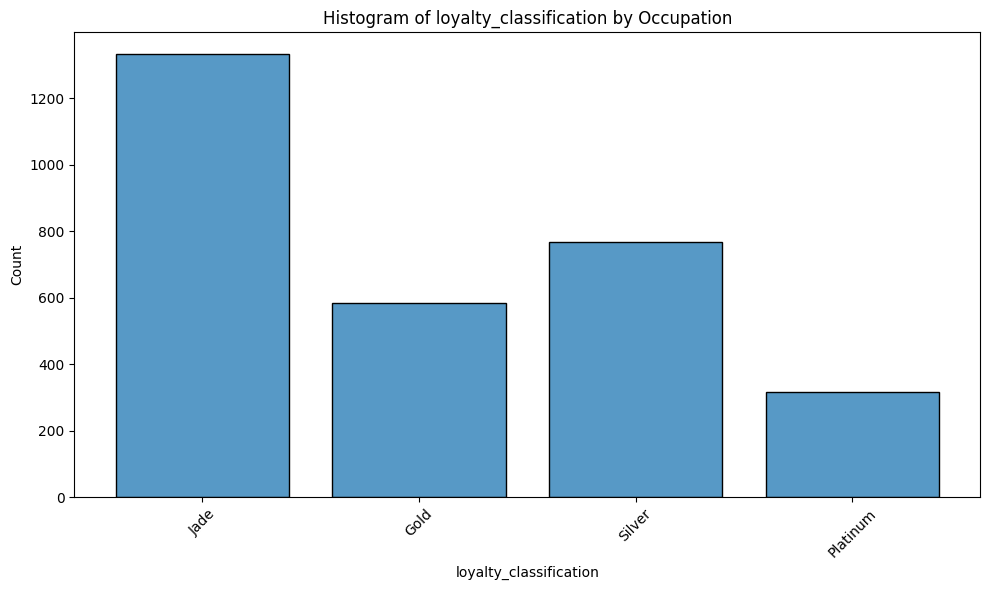

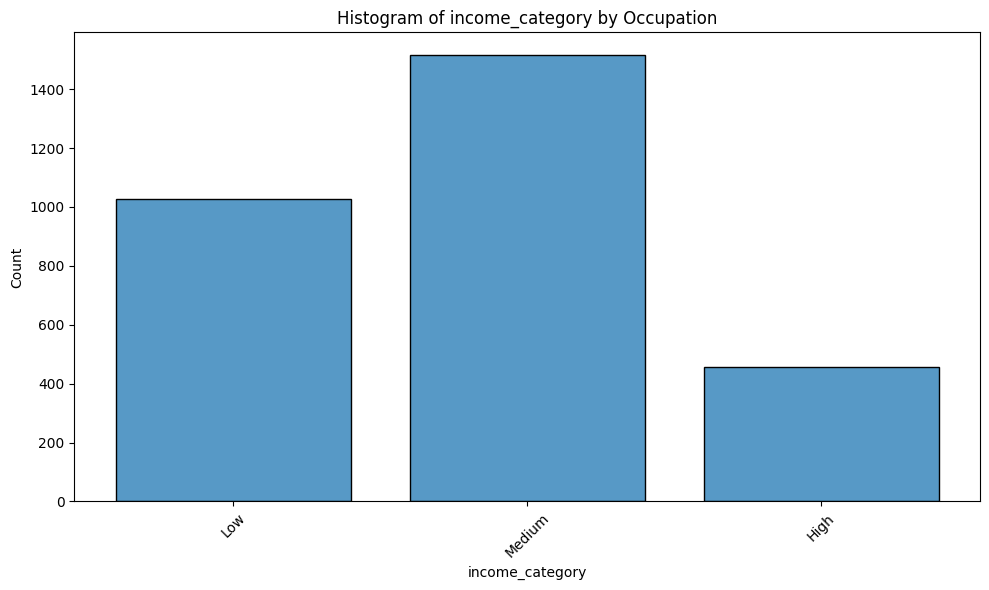

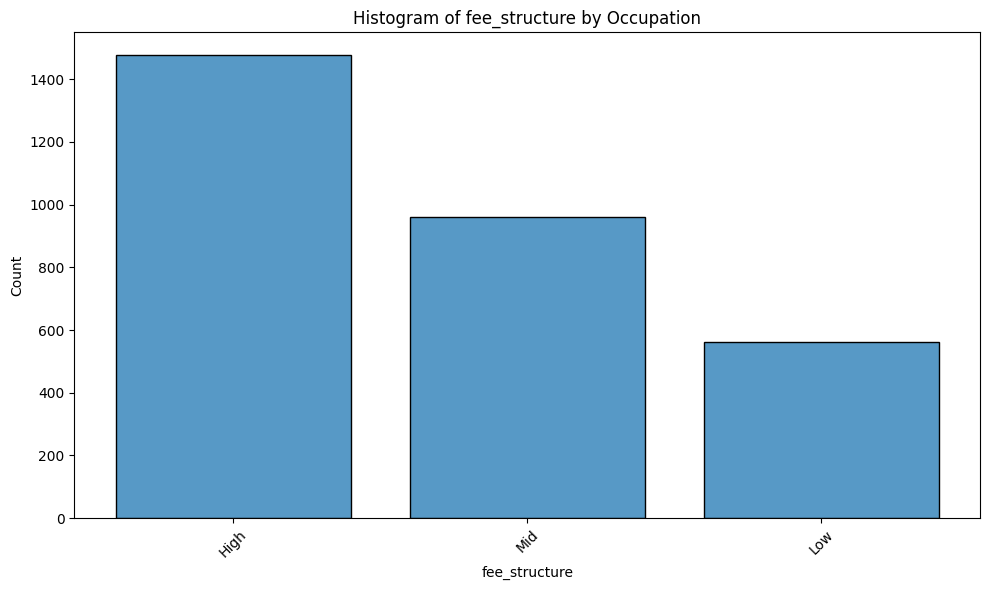

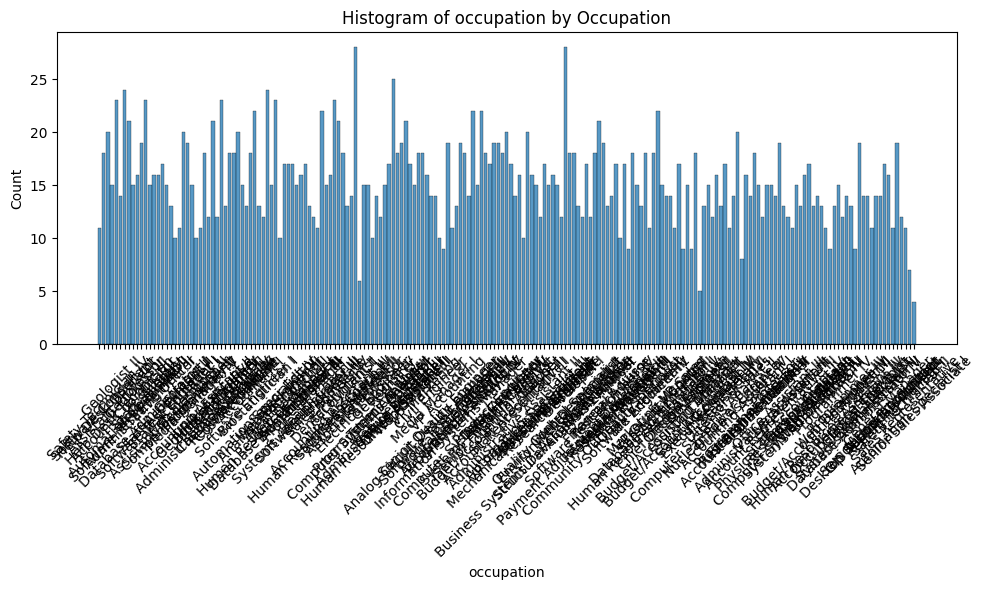

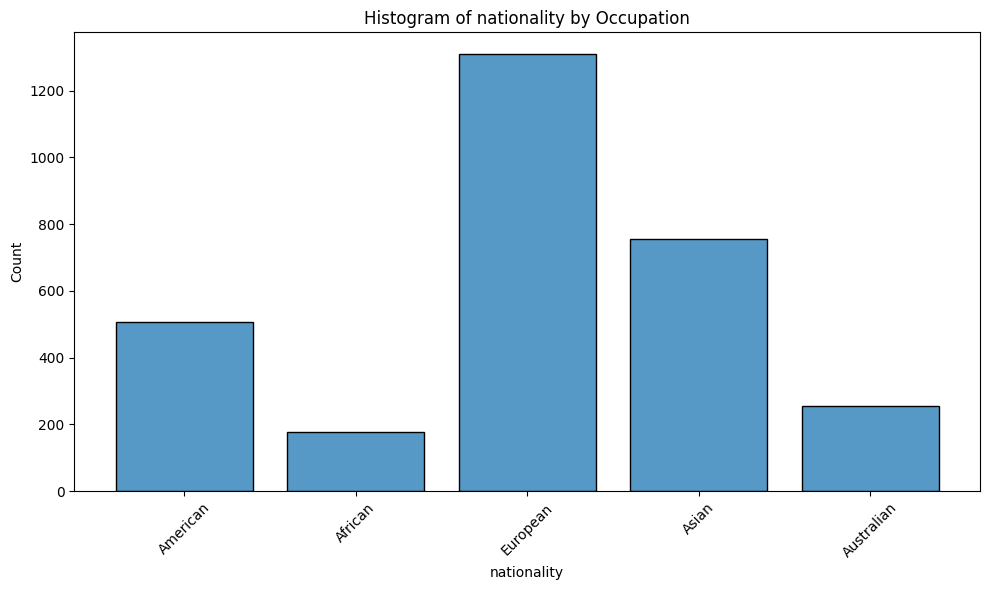

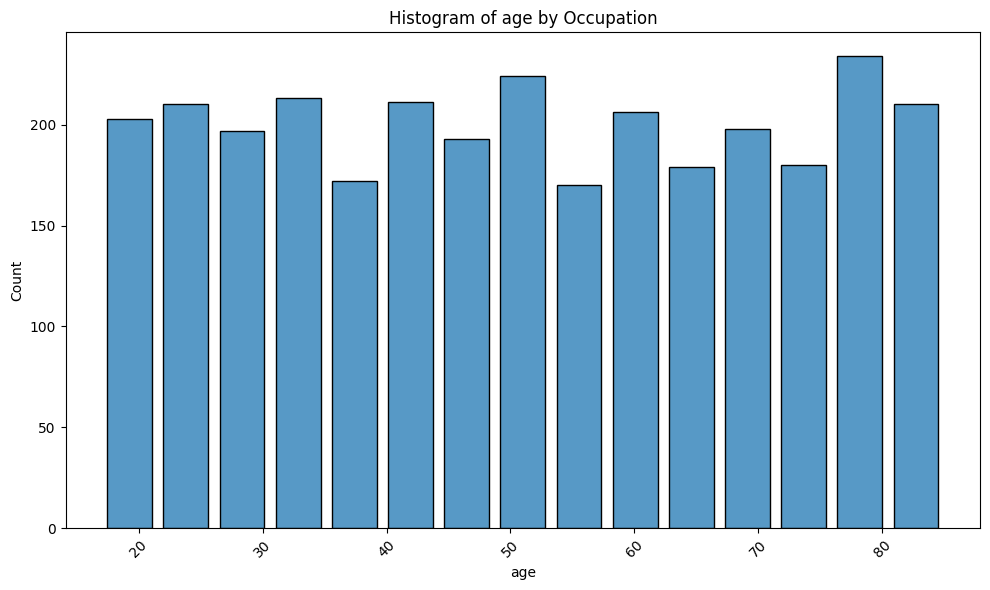

In [36]:
# #Histplot of valuecounts for different occupation
for col in categorical_cols:
    if col =='Occupation':
        continue
    plt.figure(figsize=(10,6))
    sns.histplot(data=df, x=df[col], multiple="dodge", shrink=0.8)
    plt.title(f'Histogram of {col} by Occupation')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    

### Numerical Analysis

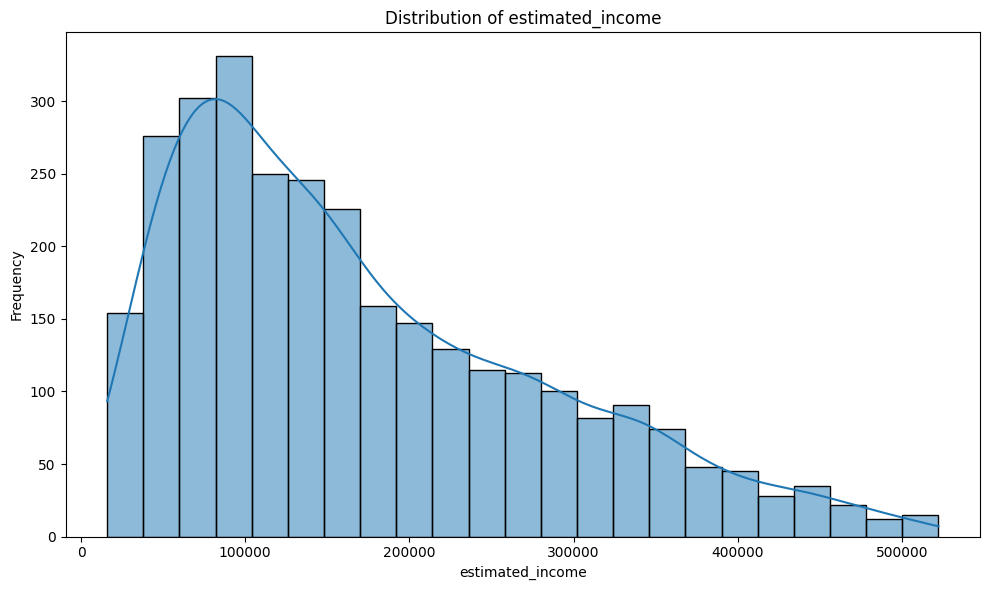

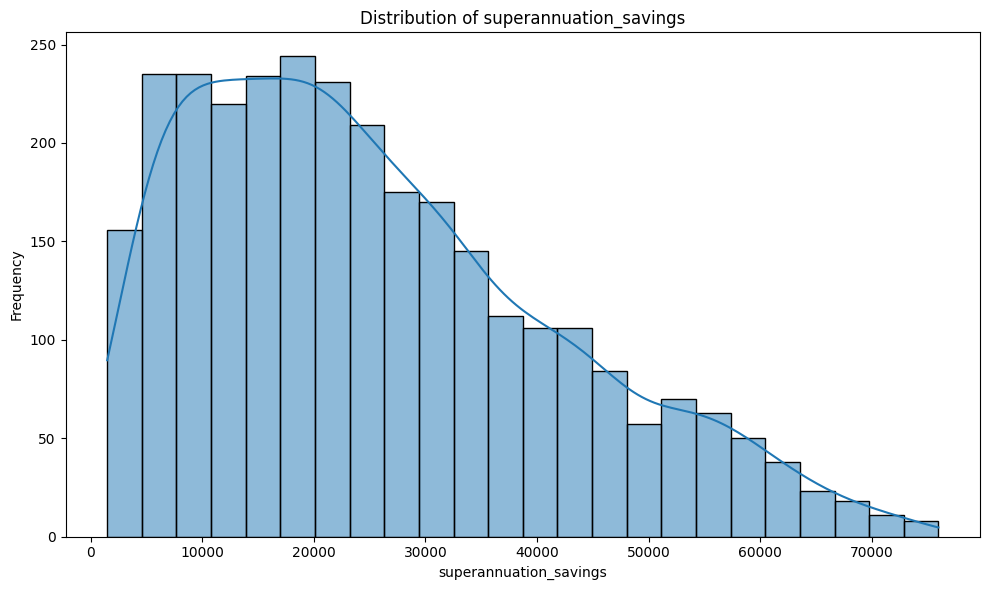

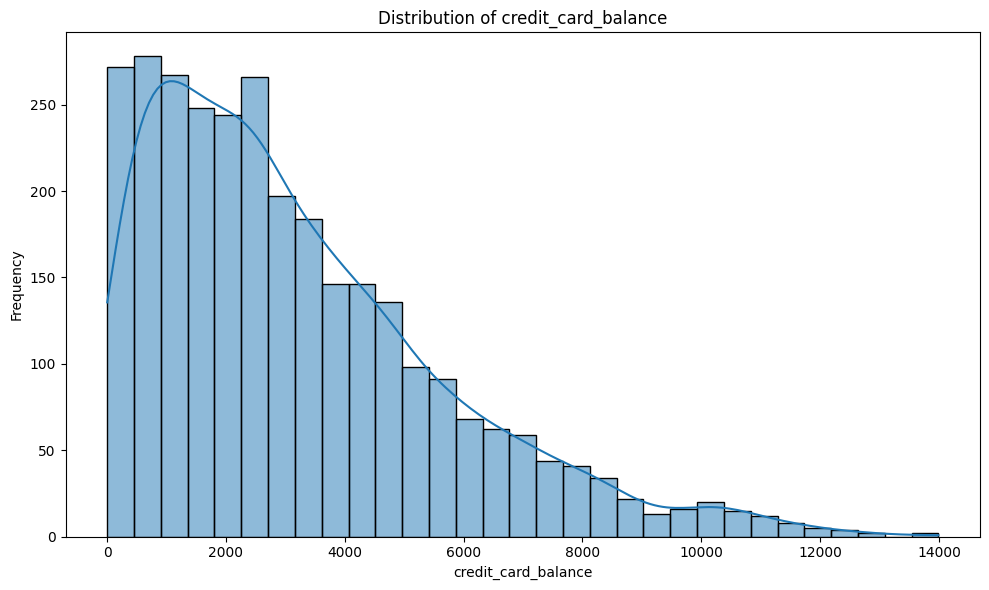

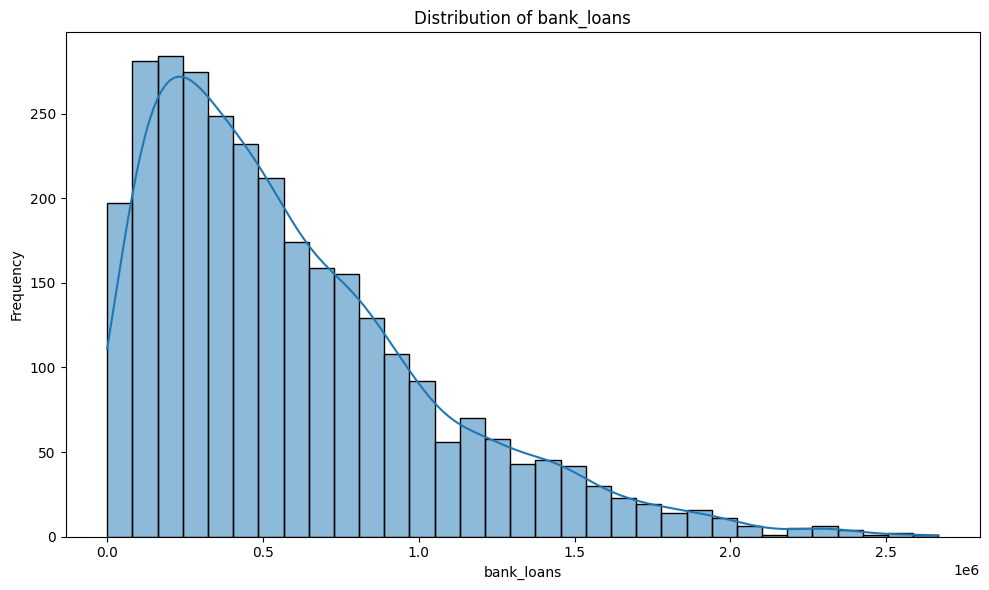

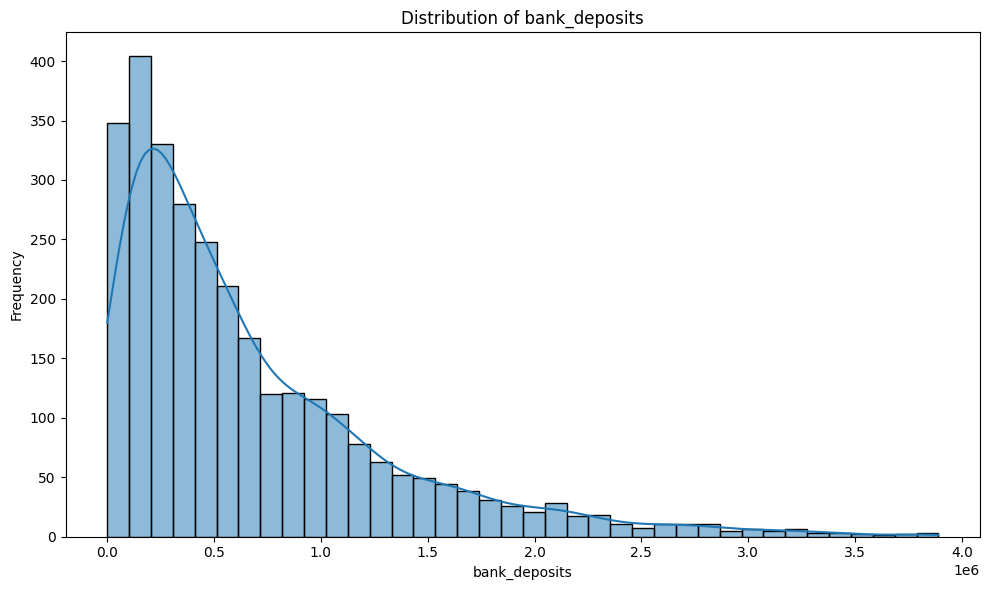

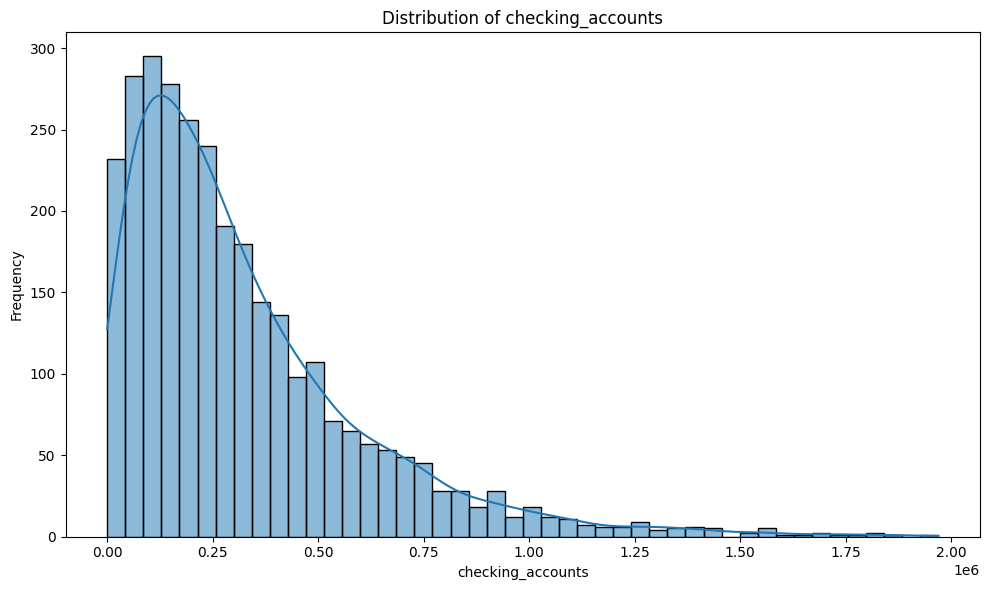

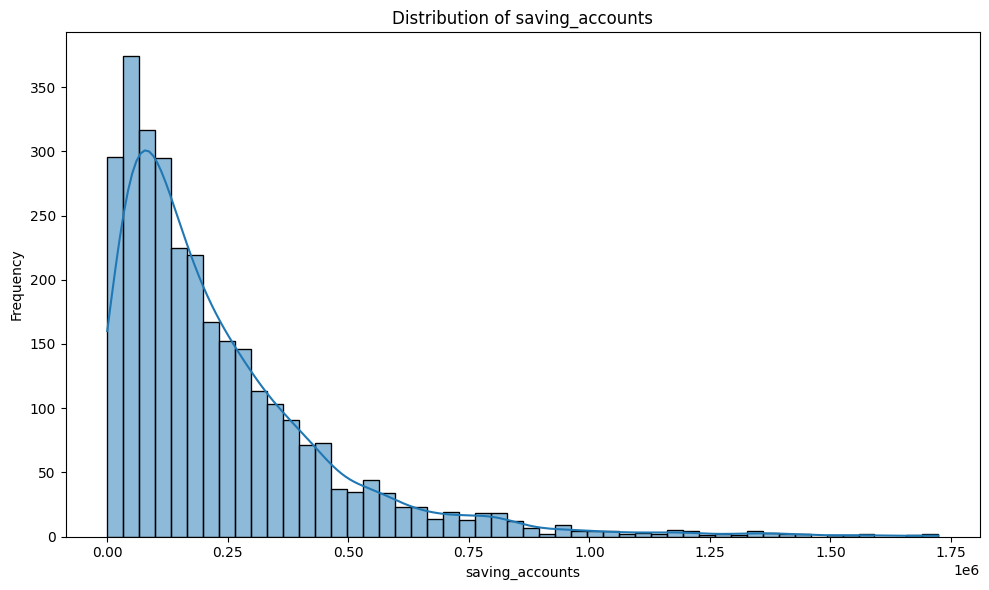

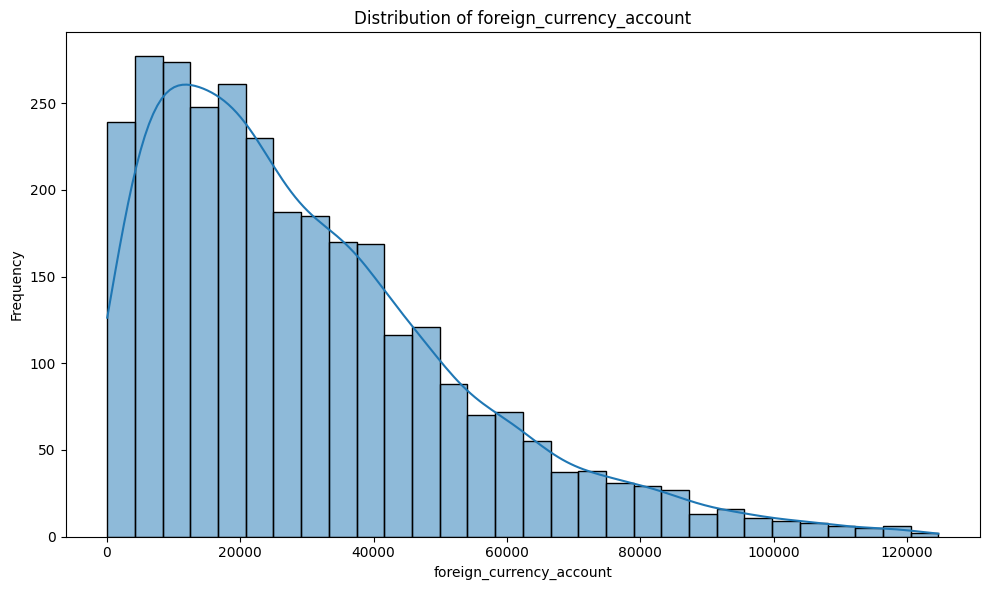

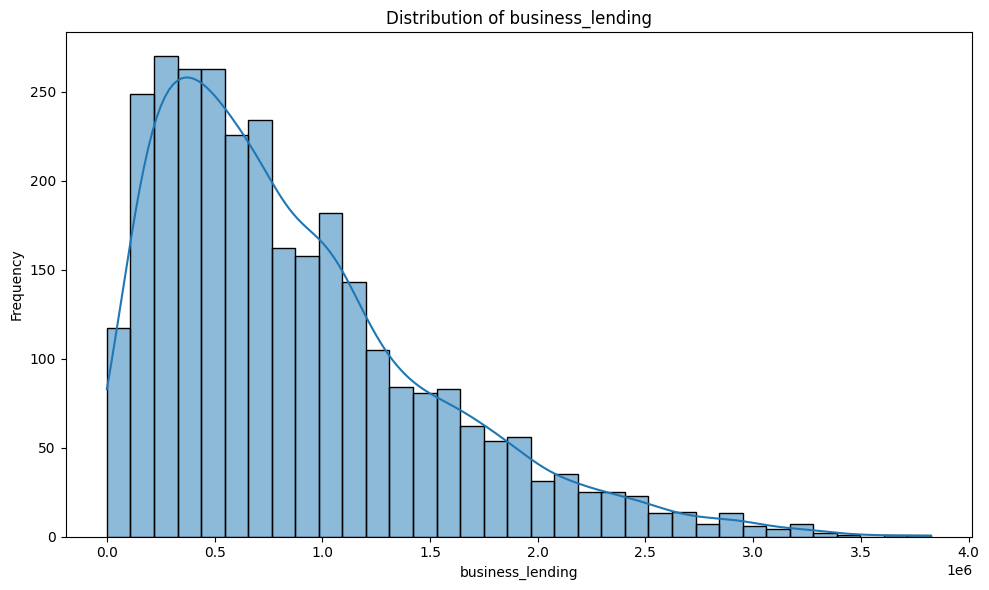

In [41]:
numerical_Cols = ['estimated_income','superannuation_savings','credit_card_balance','bank_loans','bank_deposits','checking_accounts','saving_accounts','foreign_currency_account','business_lending']
#Univariate analysis and visualization
for col in numerical_Cols:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

### HeatMaps

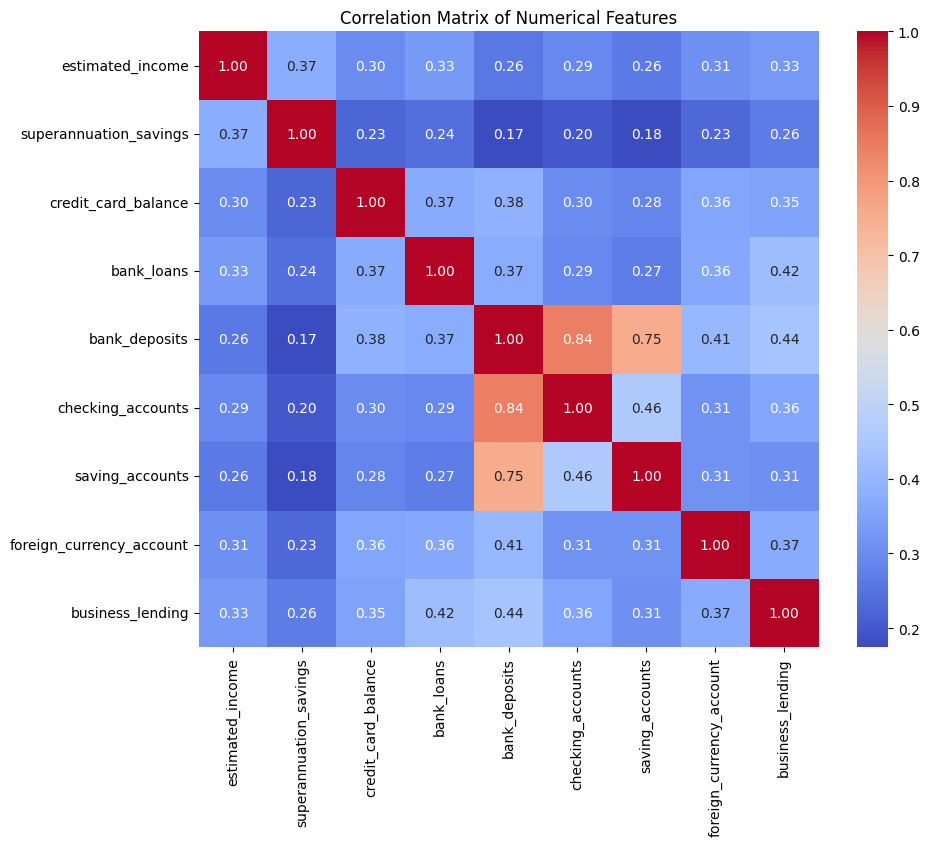

In [42]:
numerical_Cols = ['estimated_income','superannuation_savings','credit_card_balance','bank_loans','bank_deposits','checking_accounts','saving_accounts','foreign_currency_account','business_lending']
correlation_matrix = df[numerical_Cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Insights:

1. Strong Correlation between bank deposit nd checking account Bank deposit and saving account
- Suggests customers who maintain higher bank deposits also tend to have higher checking account balances.
- Indicates customers with substantial deposits often also maintain healthy savings accounts.

2. Business Lending & Bank Loans (0.42)
- Customers with business lending products are moderately likely to also have personal bank loans
- Suggests entrepreneurs may use both business and personal credit facilities

3. Credit Card Balance & Bank Loans (0.37)
- Customers carrying credit card balances are somewhat more likely to have bank loans
- Could indicate a segment of customers utilizing multiple credit products

4. Foreign Currency Accounts & Business Lending (0.37)
- Suggests international business customers may utilize both services
